In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

ModuleNotFoundError: No module named 'fastai'

In [ ]:
path=pathlib.Path('/media/tris/tris_files/era-for-bw')
path

In [3]:
df = pd.read_csv(path/'labels_proc.csv')
df.tail()

NameError: name 'pd' is not defined

In [ ]:
os.path.isfile(path/'labels_proc.csv')

In [27]:
# np.random.seed(60)
# src = (ImageList.from_csv(path, 'labels_proc.csv', folder='GAF-cmap', suffix='.png')
#        .split_by_rand_pct(0.2)
#        .label_from_df(cols=['valence','arousal','dominance','liking'],label_cls=FloatList)
#        .transform()
#        .databunch(bs=10).normalize(imagenet_stats))

In [28]:
#np.random.seed(60)
src = (ImageList.from_csv(path, 'labels_proc.csv', folder='GAF-cmap-BW', suffix='.png')
       .split_by_rand_pct(0.2)
       .label_from_df(cols=['valence','arousal','dominance','liking'],label_cls=FloatList)
       .transform()
       .databunch(bs=4).normalize())



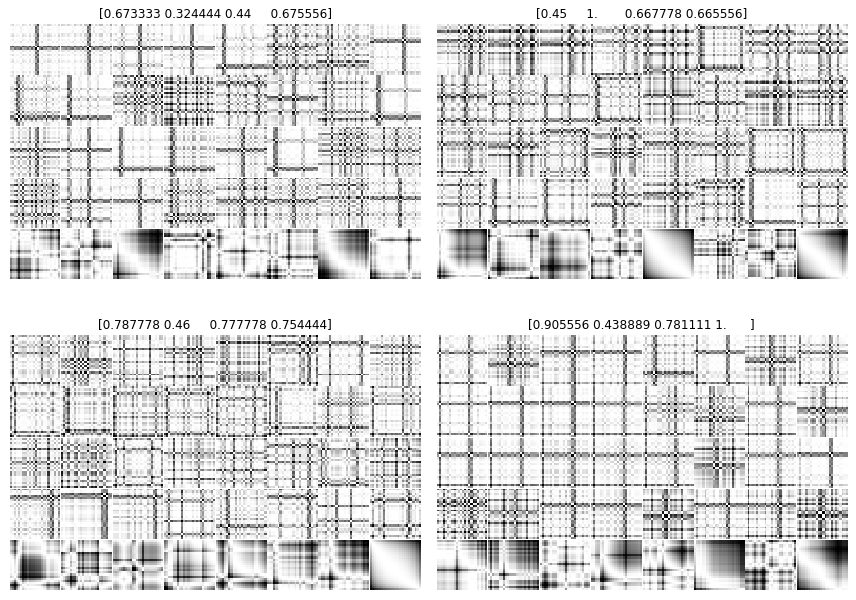

In [29]:
src.show_batch(rows=2, figsize=(12,9))

In [30]:
learn = cnn_learner(src, models.resnet34, metrics=[root_mean_squared_error], loss_func=MSELossFlat())
#learn = unet_learner(src, models.resnet18, metrics=[root_mean_squared_error])

epoch,train_loss,valid_loss,root_mean_squared_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


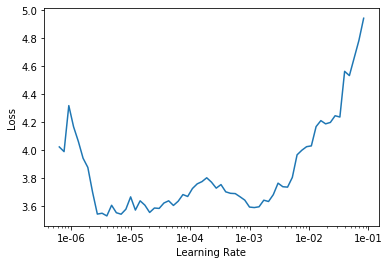

In [31]:
learn.lr_find()
learn.recorder.plot()

In [32]:
lr = 6e-3

In [33]:
learn.fit_one_cycle(5, slice(lr), wd=0.2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,1.762544,0.496812,0.686808,01:07
1,0.228061,0.097705,0.304195,01:07
2,0.124772,0.073199,0.264926,01:07
3,0.083073,0.081474,0.279375,01:08
4,0.067709,0.061493,0.242564,01:08


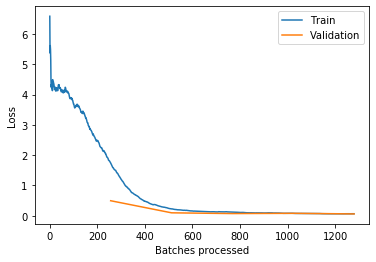

In [34]:
learn.recorder.plot_losses()

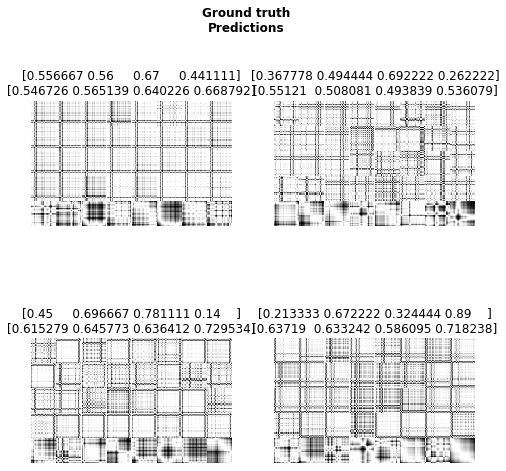

In [35]:
learn.show_results()

epoch,train_loss,valid_loss,root_mean_squared_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


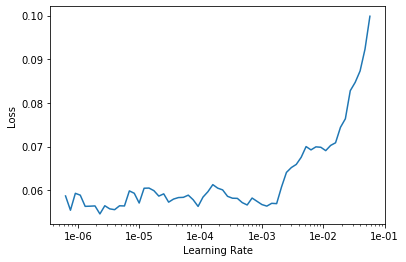

In [36]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [37]:
lr = 1e-2

In [38]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.105477,0.602862,0.659728,01:30
1,0.072961,0.063427,0.245710,01:31
2,0.066654,0.060143,0.239591,01:30
3,0.064891,0.058841,0.238033,01:30
4,0.060625,0.057733,0.235433,01:31


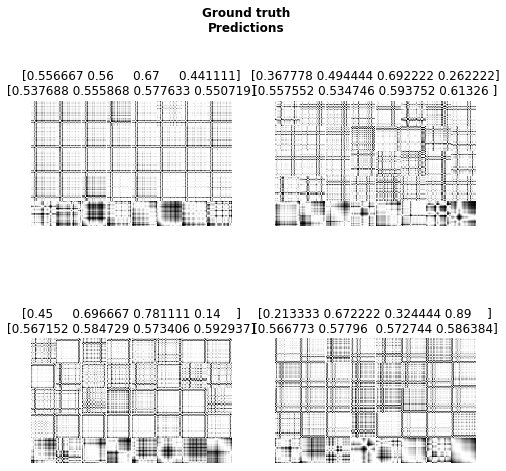

In [39]:
learn.show_results()

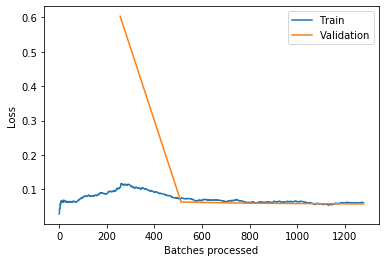

In [40]:
learn.recorder.plot_losses()

Hmmm. Not the right representation. Let's try estimating a single parameter instead of all 4